## Load Data

In [1]:
import re
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.fixes import loguniform
from sklearn.utils import shuffle

dataframe = pd.read_csv('../URL_Classification.csv', header=None)
dataframe.columns = ["index", "url", "label"]

## Preprocessing

In [2]:
dataframe['url'] = dataframe['url'].apply(lambda x: np.str_(x))

## Prepare labels

In [3]:
labels = list(set(dataframe['label']))
labels.sort()
label2id = {l: n for n, l in enumerate(labels)}
dataframe['label'] = dataframe['label'].map(label2id)

## Transform with count vectorizer

In [4]:
count_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
X = count_vectorizer.fit_transform(dataframe['url'])
y = dataframe['label'].values

X, y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Fit baseline classifier

In [5]:
clf = sklearn.linear_model.SGDClassifier(class_weight='balanced', loss='hinge') # alpha = 0.0001
start = time.time()
clf.fit(X_train, y_train)
print(f'\nTraining Time: {time.time()-start}')


Training Time: 67.11099791526794


## Classification report

In [6]:
from sklearn.model_selection import cross_val_score
print(classification_report(y_test, clf.predict(X_test)))
print(cross_val_score(clf, X, y, cv=3))

              precision    recall  f1-score   support

           0       0.36      0.78      0.49      7023
           1       0.69      0.58      0.63     50804
           2       0.66      0.46      0.54     48000
           3       0.45      0.61      0.52     23440
           4       0.68      0.59      0.64     11214
           5       0.47      0.63      0.54     12181
           6       0.55      0.64      0.59      5700
           7       0.44      0.43      0.44      9281
           8       0.11      0.63      0.18      1800
           9       0.47      0.52      0.50     21255
          10       0.39      0.69      0.49     11485
          11       0.65      0.54      0.59     22433
          12       0.40      0.45      0.43     18934
          13       0.78      0.52      0.62     48675
          14       0.68      0.70      0.69     20371

    accuracy                           0.56    312596
   macro avg       0.52      0.58      0.53    312596
weighted avg       0.60   

## Confusion matrices

Normalize: true:


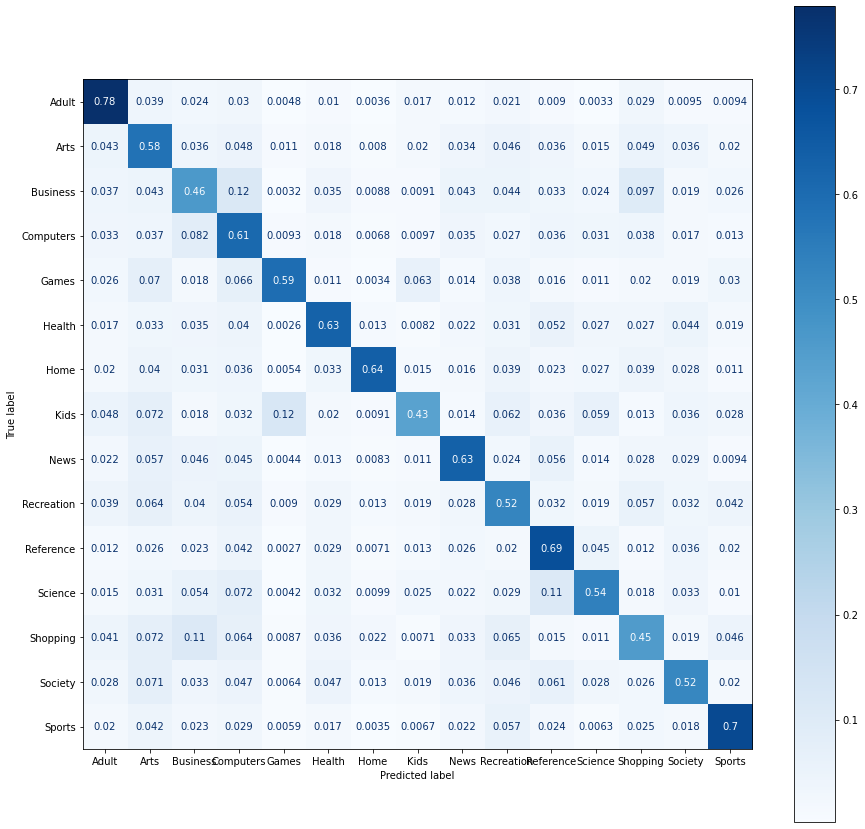

Normalize: pred:


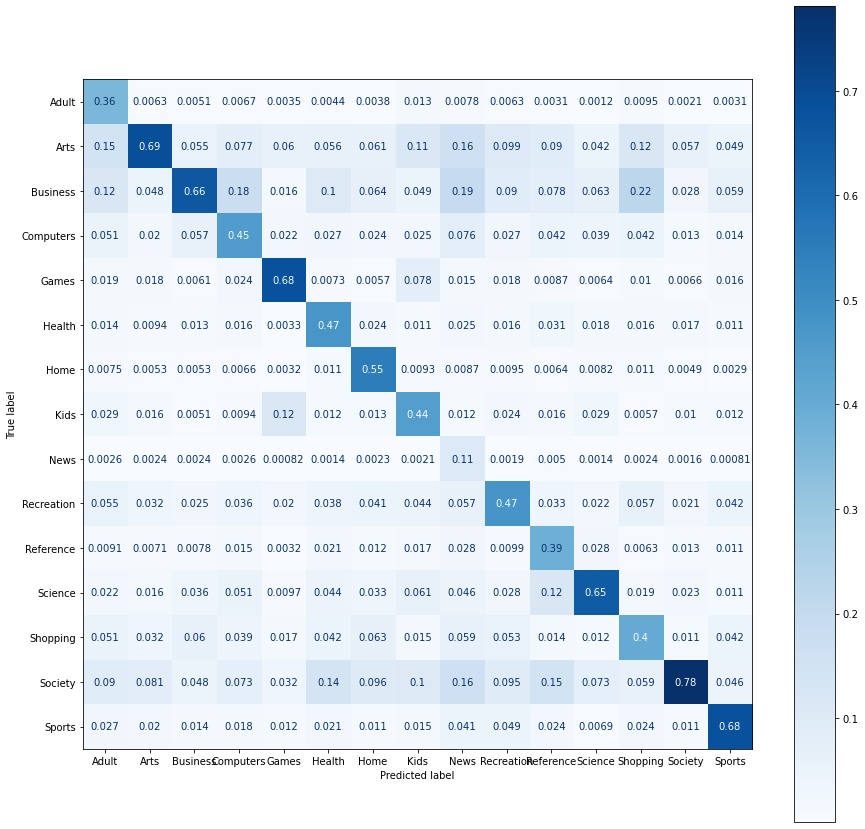

Normalize: None:


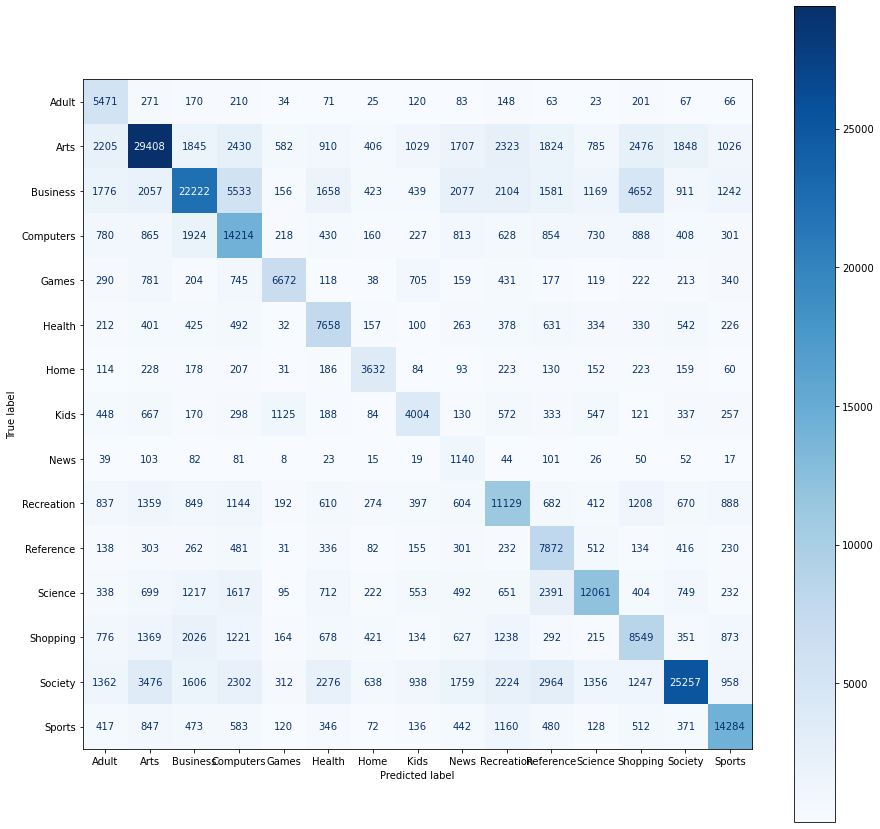

In [7]:
for norm in ['true', 'pred', None]:
    print(f'Normalize: {norm}:')
    _, ax = plt.subplots(figsize=(15,15))
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=norm,
        ax=ax
    )
    plt.show()